
driver_root_data

   Find roots for the designer system,
   u_t + (A(v)u)_x = (B(v)u_x)_x
   v_t + ((1/2)u \cdot A'(v)u + (1/2)v**2)_x = v_{xx}

  (\bar u, \bar v) = (0, \bar v(x))

  A(v) = R_{\theta(v)}A_m R_{-\theta(v)}
  B(v) = Id

  R_{\theta} = \begin{pmatrix}{ \cos(\theta) & - \sin(\theta)) \\ \sin(\theta)&
  \cos(\theta) \end{pmatrix}

  Am = [1 0; 0 -1];
  \theta(v) = M \pi v

  \bar v_{\gamma}(x) = -\gamma tanh(\gamma x/2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stablab.evans import emcset, Evans_compute
from stablab.contour import Evans_plot
from stablab.Struct import Struct
from stablab.root_finding import root_solver1, root_solver2

In [2]:
# Evans function matrix
from designer import A_coord_change as Amat

In [3]:
p = Struct()
s = Struct()

In [4]:
# parameters
p.M = 3.2836
p.gamma = 0.66

In [5]:
s.I = 10/p.gamma
s.R = s.I
s.L = -s.I

In [6]:
# stablab structures
s,e,m,c = emcset(s,'front',[2,2],'reg_reg_polar',Amat)

In [7]:
# Evans options
m.options = {'RelTol': 1e-6, 'AbsTol': 1e-8}

c.tol = 0.2
c.lambda_steps = 0
# refine the Evans function computation to achieve set relative error
c.refine = 'on'
c.best_refine = 'on'
# display a waitbar
c.stats = 'off'
# display squares during root solving
c.pic_stats = 'on';
# Root solving
c.lambda_steps = 0
c.stats = 'off'
c.ksteps = 2**8
c.moments = 'off'
c.tol = 0.2

In [15]:
# Info for root solver
c.root_fun = Evans_compute
tol = 0.05
rt_ep = 1e-4
R = 0.11
box = np.array([1e-4,rt_ep,R,R])

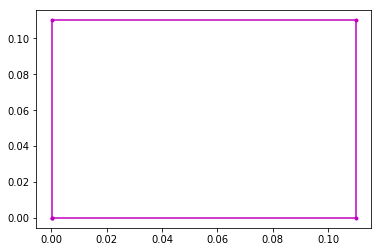

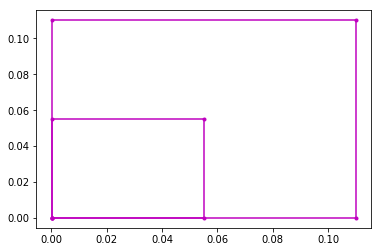

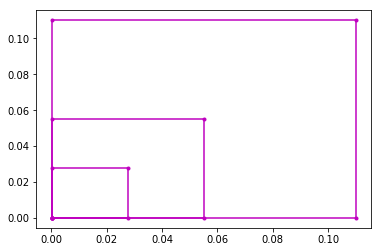

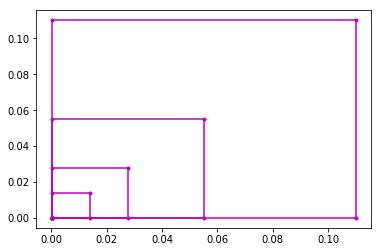

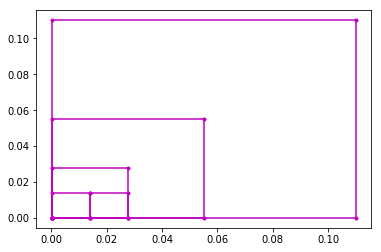

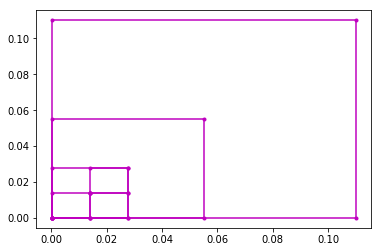

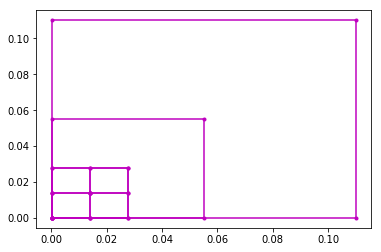

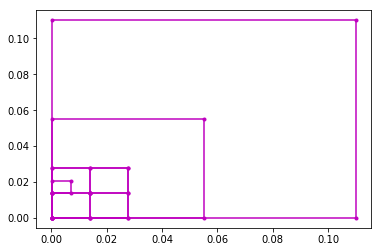

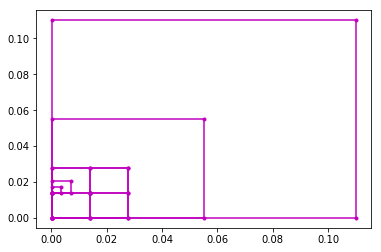

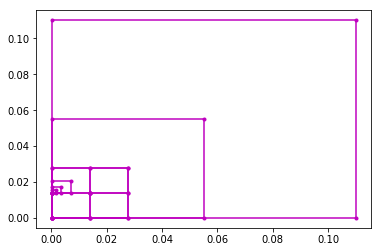

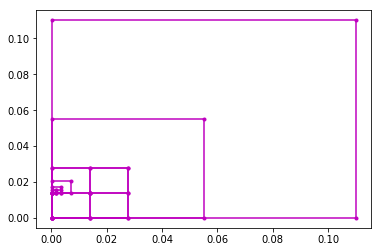

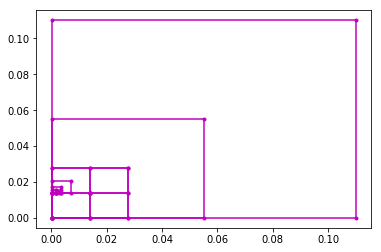

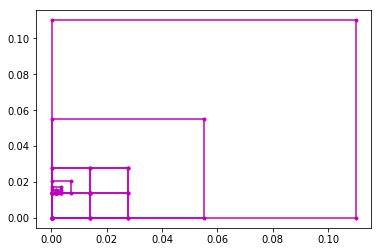

In [16]:
%config InlineBackend.close_figures=False # keep figures open in pyplot

# Solve for roots with complex part
rts1 = root_solver1(box,tol,p,s,e,m,c)
plt.plot(np.real(np.conj(rts1)),np.imag(np.conj(rts1)),'.k')

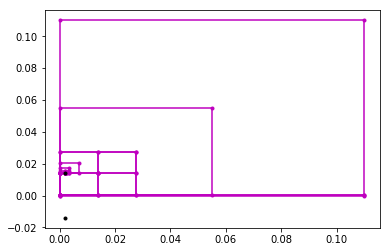

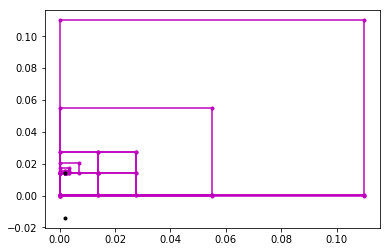

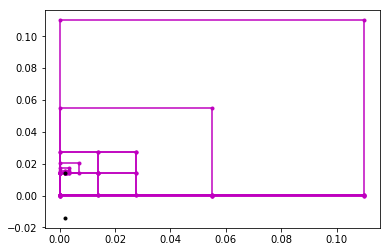

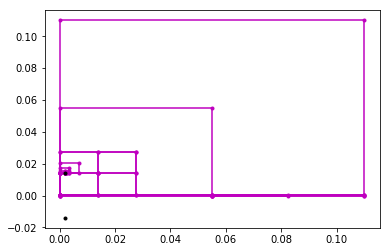

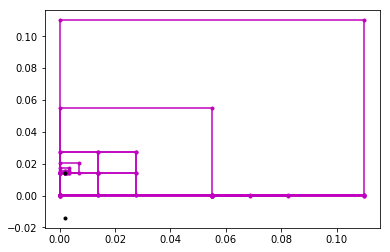

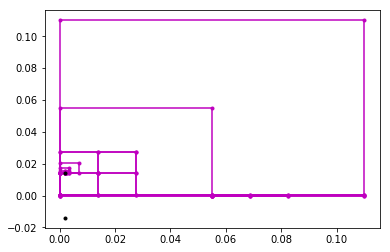

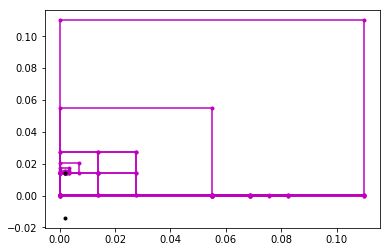

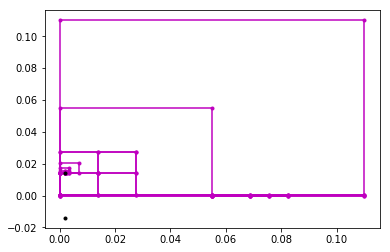

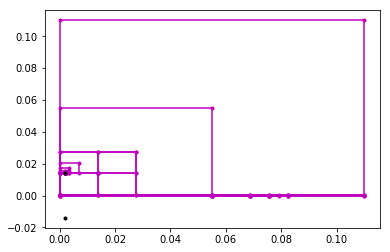

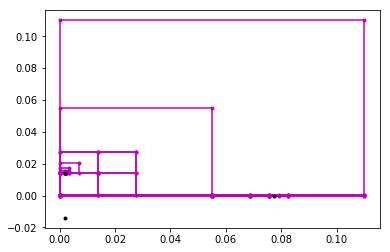

In [17]:
# Solve for real roots
box = np.array([1e-4,-1e-4,R])
rts2 = root_solver2(box,tol,p,s,e,m,c)

In [18]:
# Display all the roots
rts = [rts1,np.conj(rts1),rts2]
print(rts)

[[(0.0020318359375+0.014052148437500002j)], array([0.00203184-0.01405215j]), [(0.0773734375+0j)]]
